# Szymon Szewczyk ML

## K-means clustering - I example

In [335]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

X.shape = (120, 2)
y.shape = (120,)


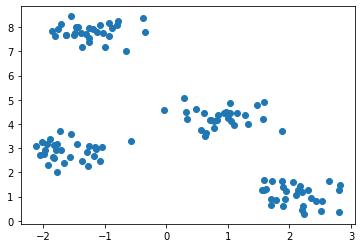

In [336]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.40, random_state=0)
print( "X.shape = {}\ny.shape = {}".format(X.shape, y.shape))

plt.scatter(X[:,0], X[:,1])
plt.show()

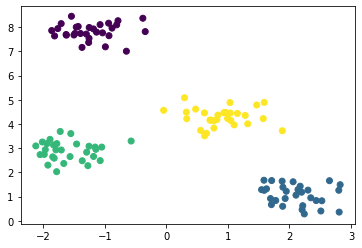

Inertia: 35.470591636759174


In [337]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


kmeans = KMeans(n_clusters=4).fit(X, y)
y_predict = kmeans.predict(X)


plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.show()

print("Inertia: {}".format(kmeans.inertia_))

## K-means clustering - II example

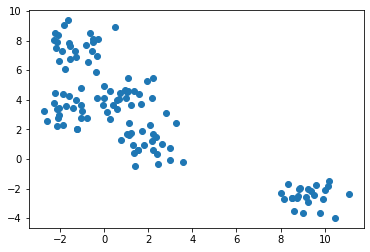

In [338]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.80, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

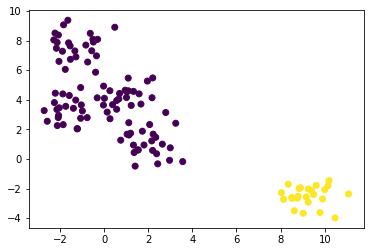

Inertia: 906.5977378177414


In [339]:
kmeans = KMeans(n_clusters=2).fit(X, y)
y_predict = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.show()

print("Inertia: {}".format(kmeans.inertia_))

## K-means++

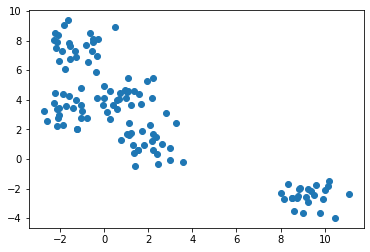

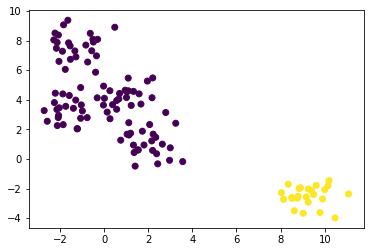

Inertia: 906.5977378177414


In [340]:
init='k-means++'

X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.80, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()


kmeans = KMeans(n_clusters=2, init=init).fit(X, y)
y_predict = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.show()

print("Inertia: {}".format(kmeans.inertia_))

## Elbow method

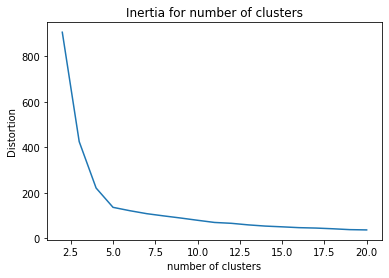

In [341]:
def elbow_method(k, X, y):
    c_dict = {}
    for i in range(2, k+1):
        kmeans = KMeans(n_clusters=i).fit(X, y)
        c_dict[i] = kmeans.inertia_
    return c_dict

c_dict = elbow_method(20, X, y)

plt.plot(c_dict.keys(), c_dict.values())
plt.title("Inertia for number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("Distortion")
plt.show()

odpowiednia ilość klastrów wynosi 5

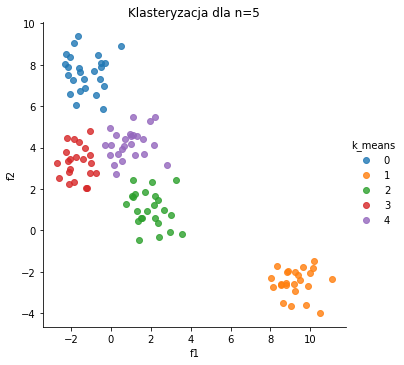

In [342]:
from sklearn.datasets import make_moons
import pandas as pd


X_elbow = pd.DataFrame(X, columns = ['f1','f2'])

kmeans = KMeans(n_clusters=5).fit(X,y)
y_km = kmeans.predict(X)

X_elbow['k_means'] = y_km
sns.lmplot(data=X_elbow, x='f1', y='f2', fit_reg=False, hue = 'k_means').set(title='Klasteryzacja dla n=5')

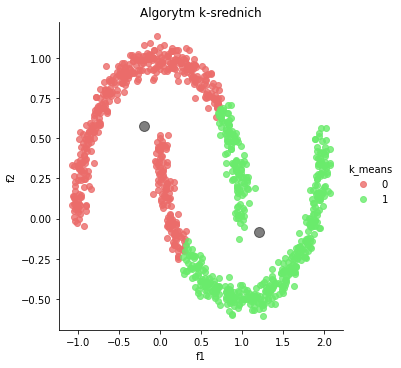

In [343]:
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

#TODO: Kmeans
kmeans = KMeans(n_clusters=2).fit(x,y)
y_km = kmeans.predict(x)
 

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()

Algorytm k-srednich nie radzi sobie z tymi zbiorami

## Clustering II - hierarchical methods

### Dendrograms

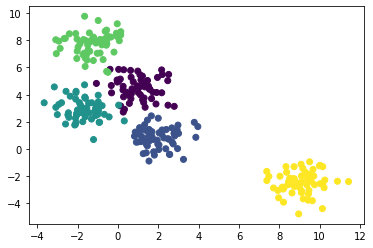

In [344]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y_true)
plt.show()

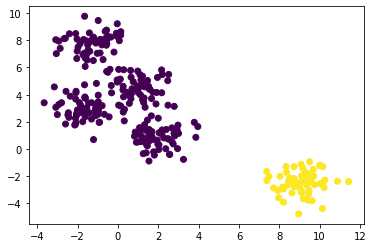

In [345]:
kmeans = KMeans(n_clusters=2).fit(X, y_true)
y_km = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_km)
plt.show()

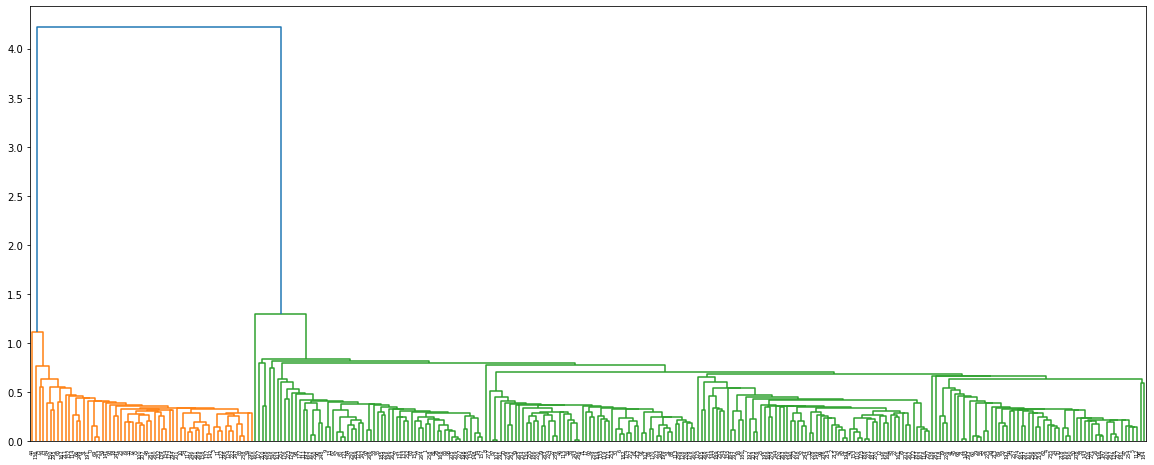

In [346]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
fig = plt.figure(figsize=(20, 8))
dn = dendrogram(Z)

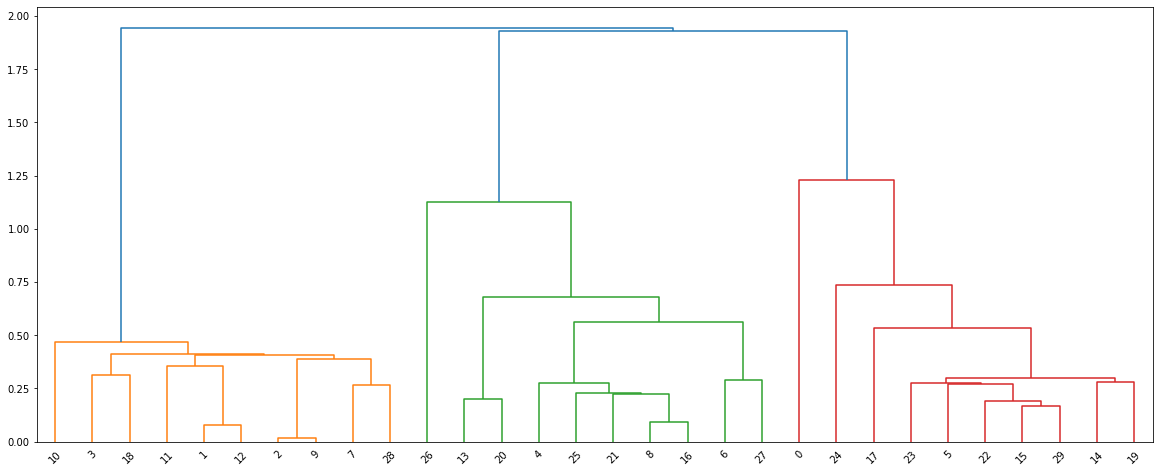

In [347]:
X, y_true = make_blobs(n_samples=30, centers=3, cluster_std=0.5, random_state=0)

Z = linkage(X)
fig = plt.figure(figsize=(20, 8))
dn = dendrogram(Z)

### Agglomerative clustering

In [348]:
df = pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


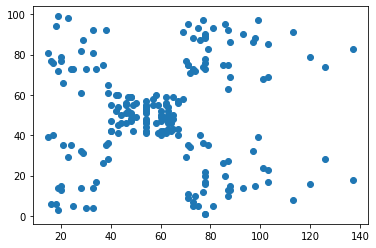

In [349]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data = np.array(data)

plt.scatter(data[:,0], data[:,1])
plt.show()

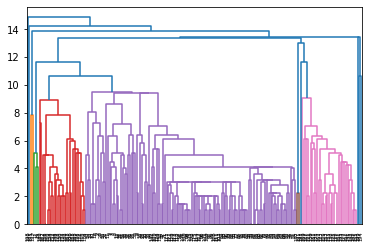

In [350]:
Z = linkage(data)
fig = plt.figure()
dn = dendrogram(Z)

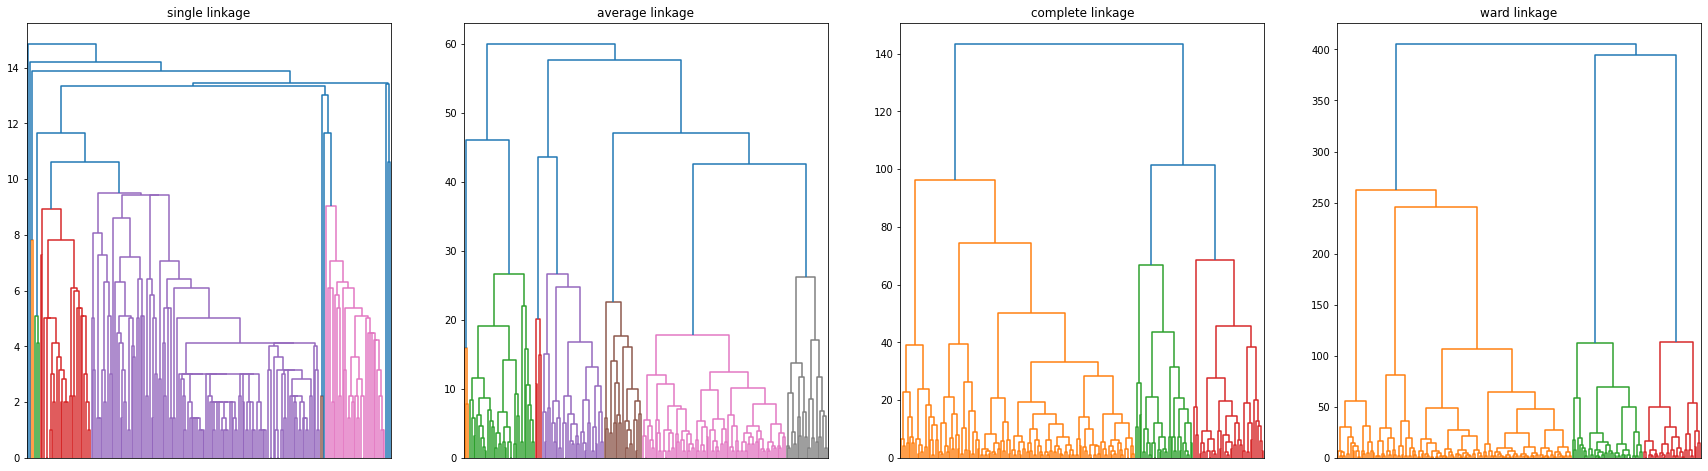

In [351]:
fig, ax = plt.subplots(1,4, figsize=(30,8))

den_1 = dendrogram(linkage(data, 'single'), ax=ax[0])
den_2 = dendrogram(linkage(data, 'average'), ax=ax[1])
den_1 = dendrogram(linkage(data, 'complete'), ax=ax[2])
den_2 = dendrogram(linkage(data, 'ward'), ax=ax[3])

ax[0].set_title('single linkage')
ax[1].set_title('average linkage')
ax[2].set_title('complete linkage')
ax[3].set_title('ward linkage')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])
plt.show()

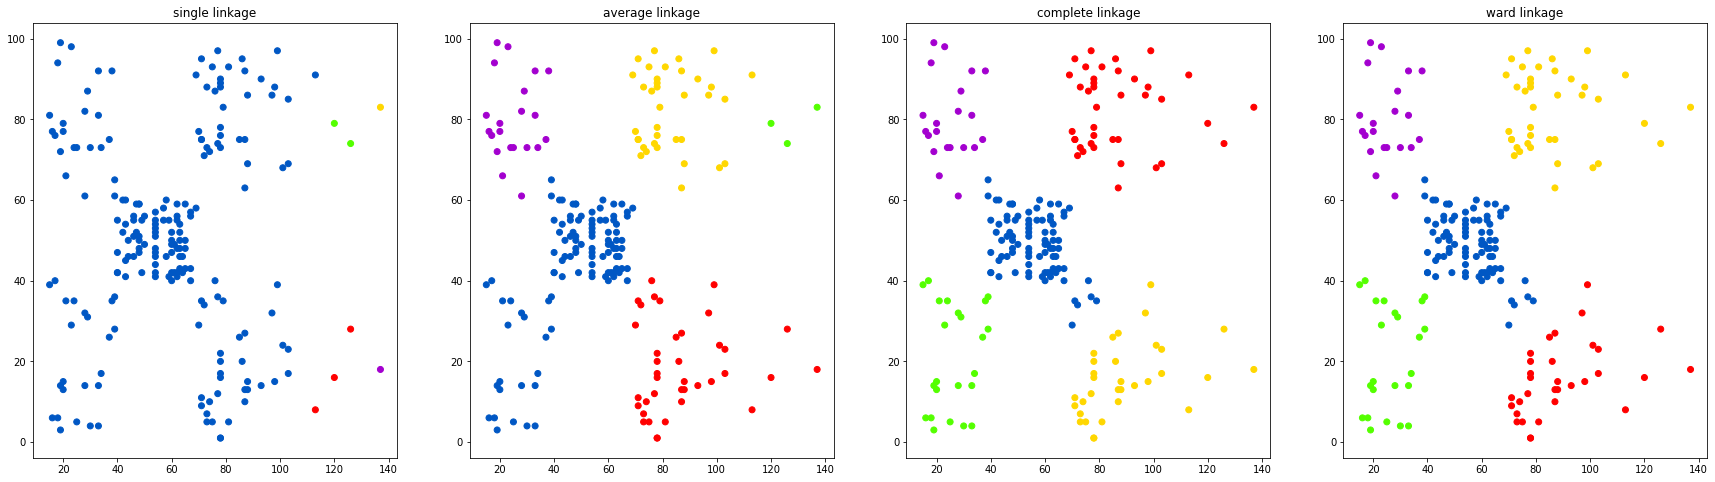

In [352]:
from sklearn.cluster import AgglomerativeClustering

single = AgglomerativeClustering(n_clusters=5, linkage="single")
average = AgglomerativeClustering(n_clusters=5, linkage="average")
complete = AgglomerativeClustering(n_clusters=5, linkage="complete")
ward = AgglomerativeClustering(n_clusters=5, linkage="ward")

single_pred = single.fit_predict(data)
average_pred = average.fit_predict(data)
complete_pred = complete.fit_predict(data)
ward_pred = ward.fit_predict(data)


fig, ax = plt.subplots(1,4, figsize=(30,8))

ax[0].scatter(data[:,0], data[:,1], c=single_pred, cmap='prism')
ax[0].set_title('single linkage')
ax[1].scatter(data[:,0], data[:,1], c=average_pred, cmap='prism')
ax[1].set_title('average linkage')
ax[2].scatter(data[:,0], data[:,1], c=complete_pred, cmap='prism')
ax[2].set_title('complete linkage')
ax[3].scatter(data[:,0], data[:,1], c=ward_pred, cmap='prism')
ax[3].set_title('ward linkage')
plt.show()

### Selecting the number of clusters with silhouatte analysis of KMeans clustering

For n_clusters:  2  silhouette_score is:  0.7049787496083262
For n_clusters:  3  silhouette_score is:  0.5882004012129721
For n_clusters:  4  silhouette_score is:  0.6505186632729437
For n_clusters:  5  silhouette_score is:  0.56376469026194
For n_clusters:  6  silhouette_score is:  0.4504666294372765


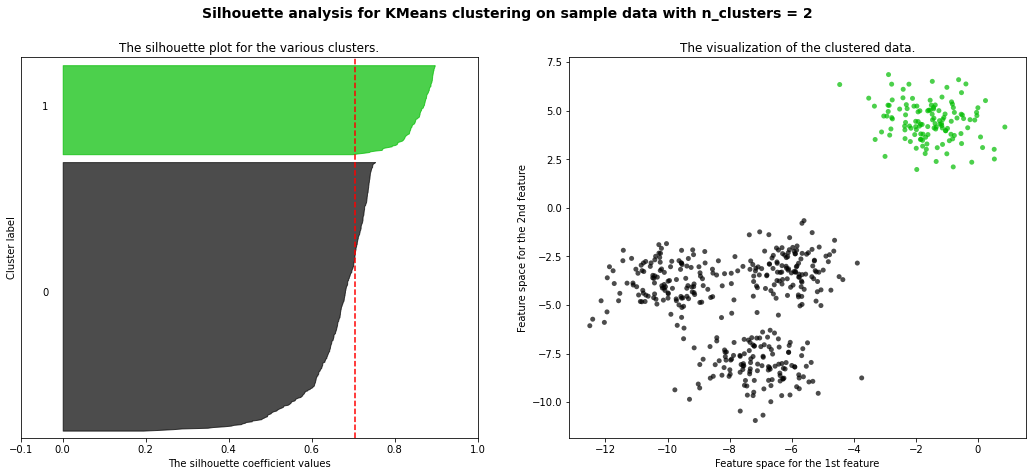

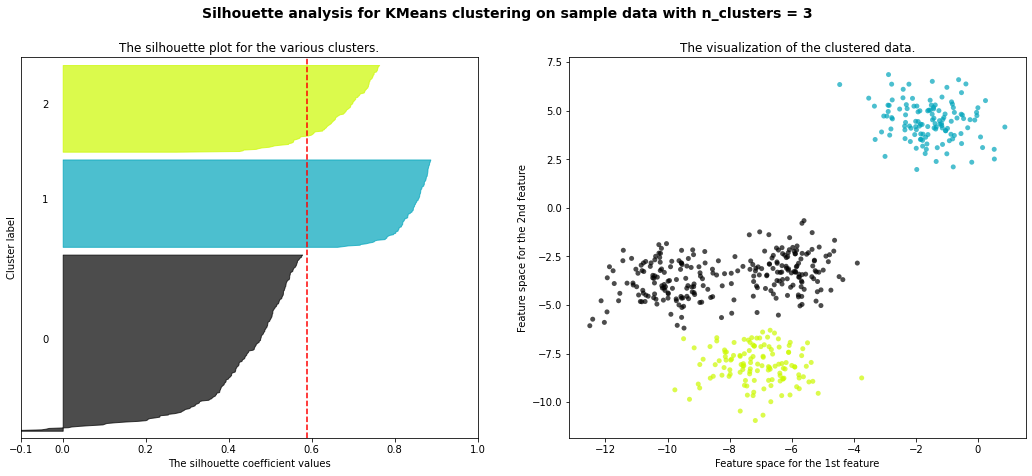

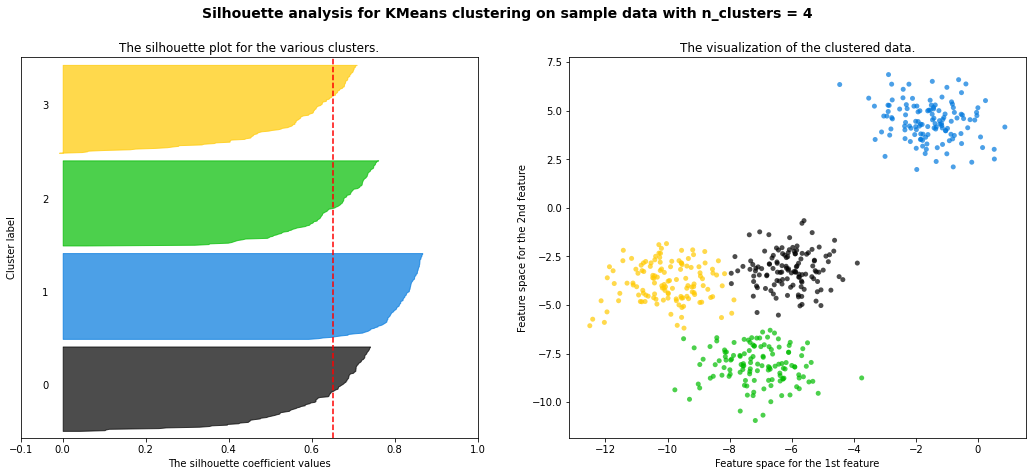

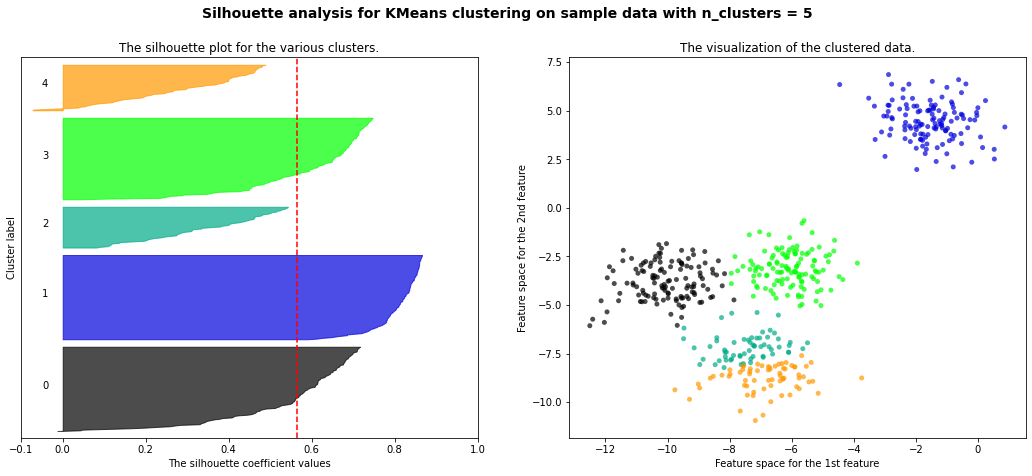

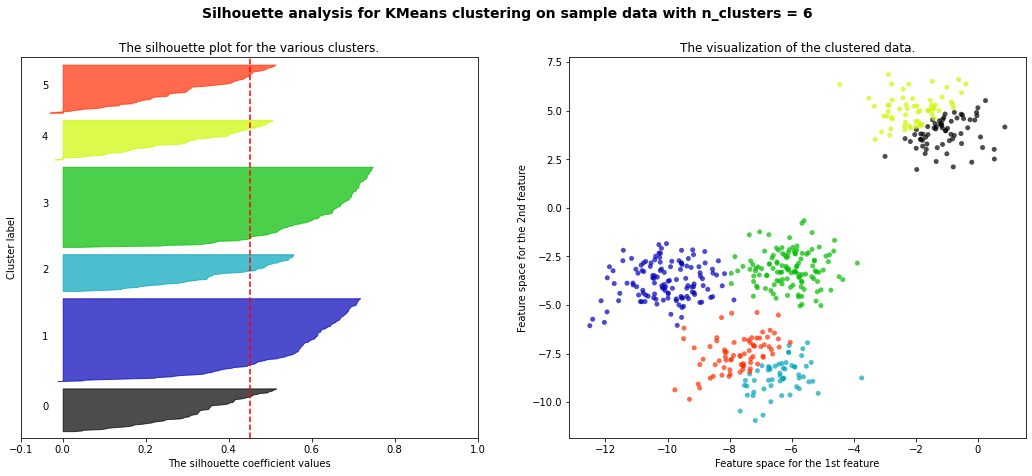

In [353]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(("For n_clusters:  {}  silhouette_score is:  {}").format(n_clusters, silhouette_avg))

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7, cmap='prism')

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( X[:, 0], X[:, 1], marker=".", s=100, lw=0, alpha=0.7, c=colors, edgecolor="k", cmap='prism')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold")

plt.show()

### DBSCAN - density based clusterring

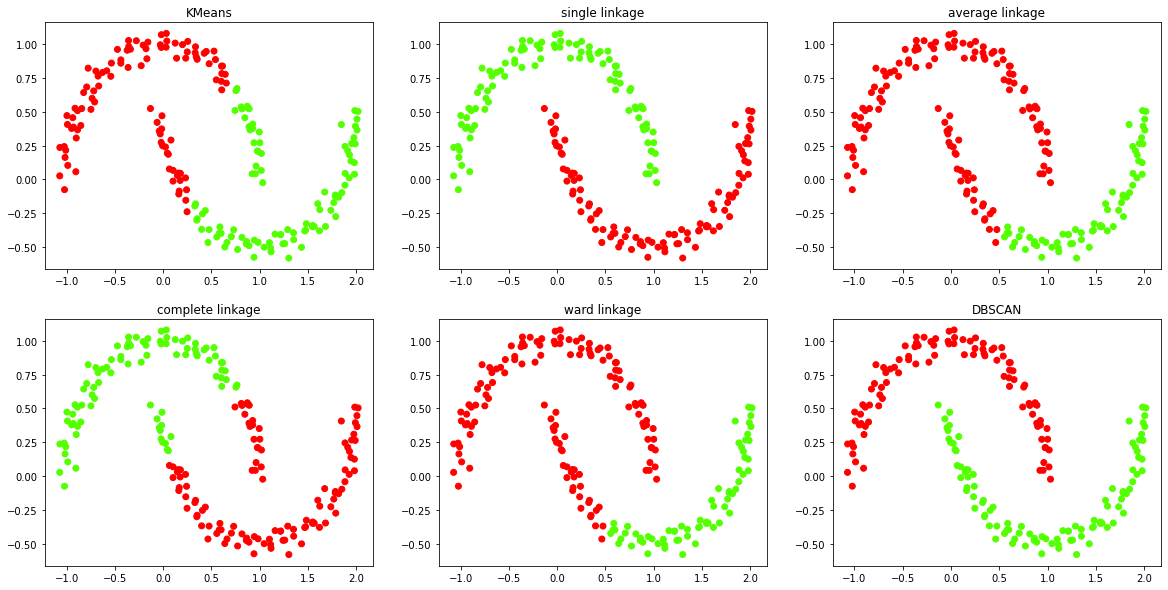

In [354]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles


x, y = make_moons(n_samples=200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=2).fit(x)
single = AgglomerativeClustering(n_clusters=2, linkage="single")
average = AgglomerativeClustering(n_clusters=2, linkage="average")
complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
ward = AgglomerativeClustering(n_clusters=2, linkage="ward")
db = DBSCAN(eps=0.2, min_samples=2).fit(x)

km_pred = kmeans.predict(x)
single_pred = single.fit_predict(x)
average_pred = average.fit_predict(x)
complete_pred = complete.fit_predict(x)
ward_pred = ward.fit_predict(x)
db_pred = db.labels_


fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].scatter(x[:,0], x[:,1], c=km_pred, cmap='prism')
ax[0,0].set_title('KMeans')
ax[0,1].scatter(x[:,0], x[:,1], c=single_pred, cmap='prism')
ax[0,1].set_title('single linkage')
ax[0,2].scatter(x[:,0], x[:,1], c=average_pred, cmap='prism')
ax[0,2].set_title('average linkage')
ax[1,0].scatter(x[:,0], x[:,1], c=complete_pred, cmap='prism')
ax[1,0].set_title('complete linkage')
ax[1,1].scatter(x[:,0], x[:,1], c=ward_pred, cmap='prism')
ax[1,1].set_title('ward linkage')
ax[1,2].scatter(x[:,0], x[:,1], c=db_pred, cmap='prism')
ax[1,2].set_title('DBSCAN')
plt.show()

W tym przypadku single linkage oraz DBSCAN dają pożądany efekt. Single linkage wymaga wprowadzenia ilości klastrów aby wynik był prawidłowy. W przypadku DBSCAN ilość klastrów nie jest wymagana, jednak dobór parametrów wymaga trochę "nagimnastykowania się".